In [9]:
#import necessary libraries

import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline
#importing data
whale_navs=pd.read_csv(
    Path("/Users/Brian/Desktop/fintech-workspace/Module_4/Starter_Code/Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True,
)
#display data
display(whale_navs.head())
display(whale_navs.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79
2020-09-10,31.486896,14.388256,63.308920,64.306412,333.89
2020-09-11,31.473747,14.360482,63.281442,64.241088,334.06


In [10]:
#create daily returns df and confirm output w/ .head()
daily_returns=whale_navs.pct_change().dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


<AxesSubplot:title={'center':'Daily Returns of NAVs and Market'}, xlabel='date'>

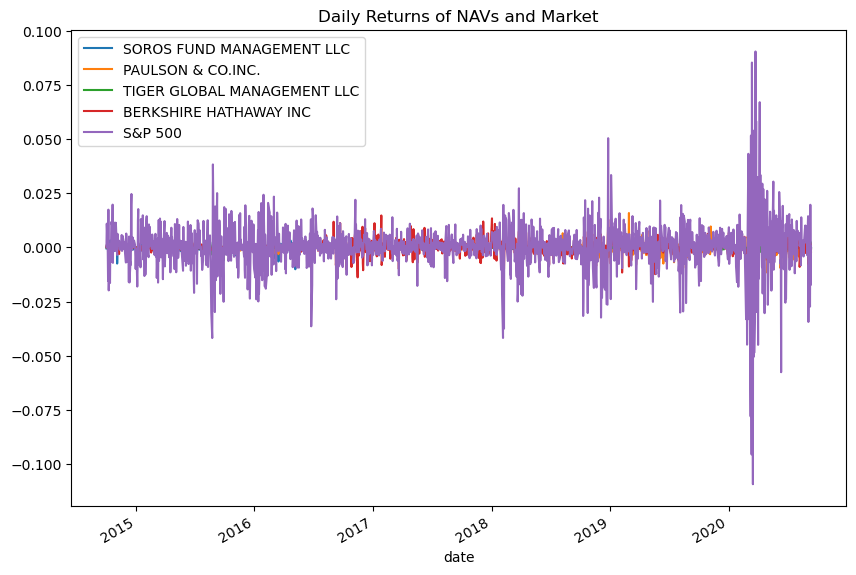

In [11]:
#plot daily returns data
daily_returns.plot(figsize=(10,7), title="Daily Returns of NAVs and Market")

In [16]:
#calculate cumulative returns for daily returns df. Review tail
cumulative_returns=(1+daily_returns).cumprod()
daily_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,-0.001079,0.005050,-0.000653,-0.003985,-0.008165
2020-09-08,-0.001737,-0.001888,-0.001270,-0.005019,-0.027323
2020-09-09,0.001115,0.002123,0.002701,0.001817,0.019747
2020-09-10,-0.001258,0.001389,-0.001591,-0.002398,-0.017364
2020-09-11,-0.000418,-0.001930,-0.000434,-0.001016,0.000509


<AxesSubplot:title={'center':'Cumulative Returns of NAVs and Market'}, xlabel='date'>

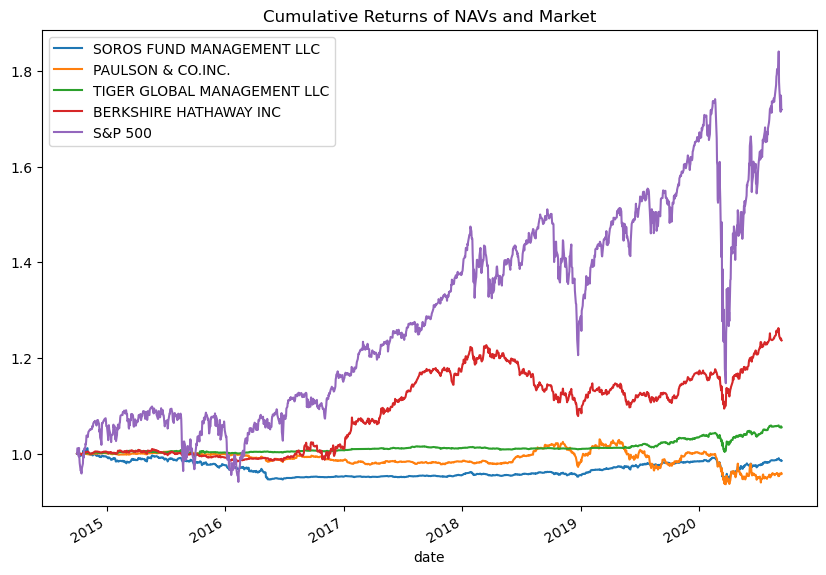

In [17]:
#plot cumulative returns
cumulative_returns.plot(figsize=(10,7), title="Cumulative Returns of NAVs and Market")

Q: Do any of the four portfolios outperform the S&P 500 based on this visual?
A: No, it appears it would have been more lucrative to invest funds in the market

<AxesSubplot:title={'center':'Daily Returns for NAVs and Market'}>

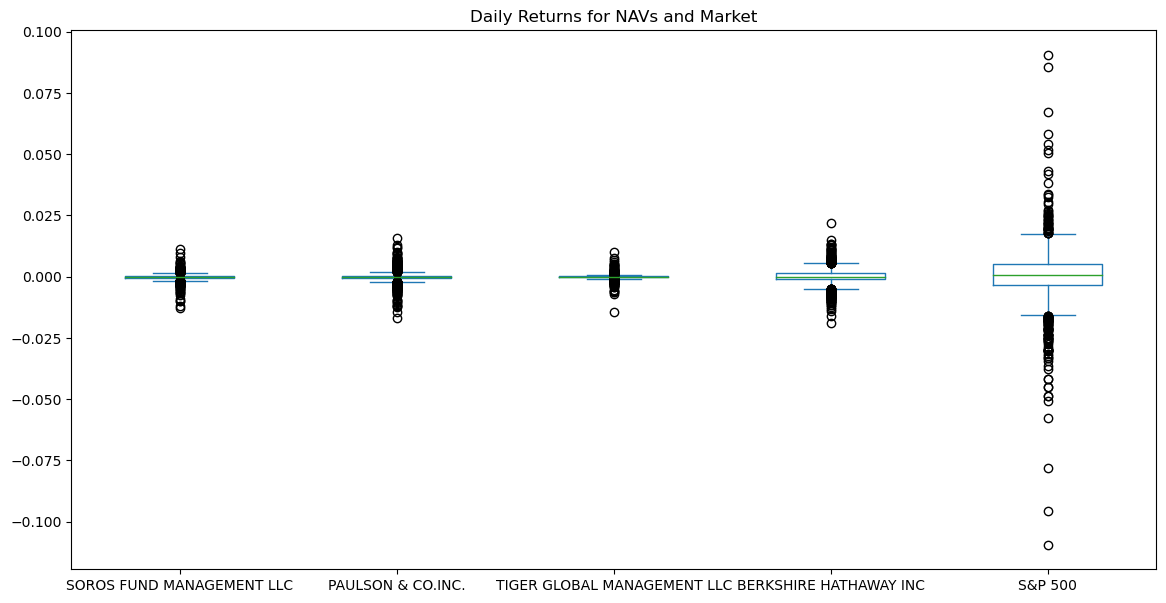

In [27]:
#create box plot for daily returns df
daily_returns.plot.box(figsize=(14,7), title="Daily Returns for NAVs and Market")

<AxesSubplot:title={'center':'Daily Returns for NAVs'}>

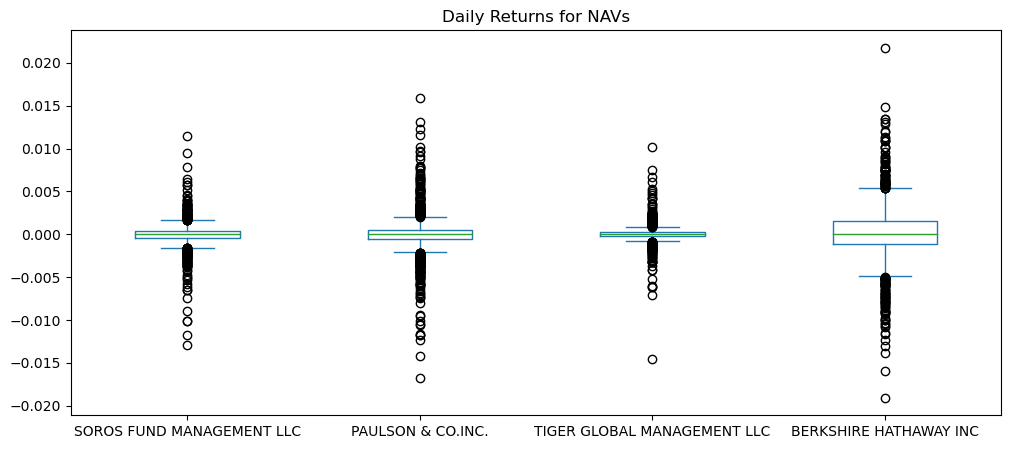

In [30]:
#create portfolio daily returns df (drop S&P 500)
portfolio_daily_returns=daily_returns.drop(columns=["S&P 500"])
portfolio_daily_returns.plot.box(figsize=(12,5), title="Daily Returns for NAVs")

Q:Which fund was the most volatile and whic was the least volatile based on the visualization?
A:It appears Berkshire Hathaway was the most volatile with outliers further out. Tiger Global may have been the least; it appears to have less outliers
and a closer grouping of its deviations.

In [31]:
#calc standard deviation
standard_deviation=daily_returns.std()
standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [37]:
#calc annualized standard deviation
trading_days=252
annualized_standard_deviation=standard_deviation * np.sqrt(trading_days)
annualized_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Rolling Standard Deviations- 21-Day'}, xlabel='date'>

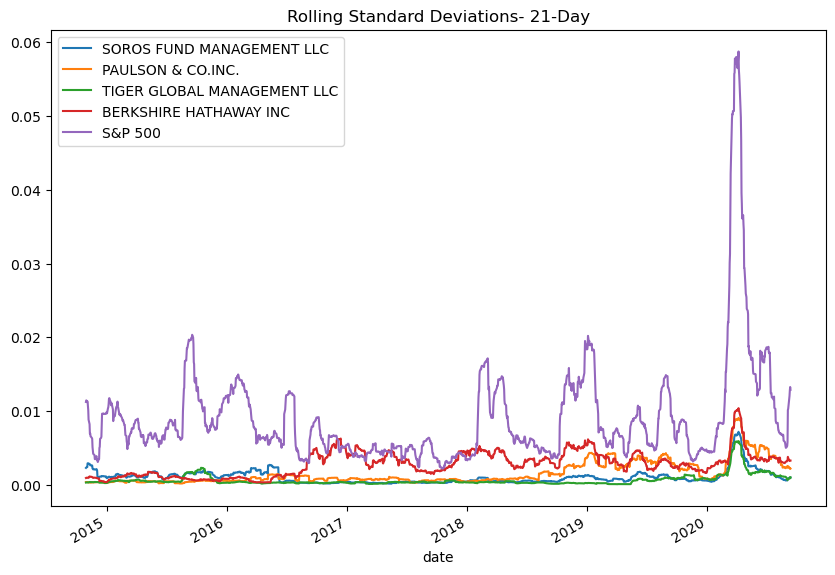

In [43]:
#use the daily_returns df and a 21-day rolling window to plot the rolling standard deviations for portfolio and market
daily_returns.rolling(window=21).std().plot(figsize=(10,7), title="Rolling Standard Deviations- 21-Day")

<AxesSubplot:title={'center':'Rolling Standard Deviations- 21-Day'}, xlabel='date'>

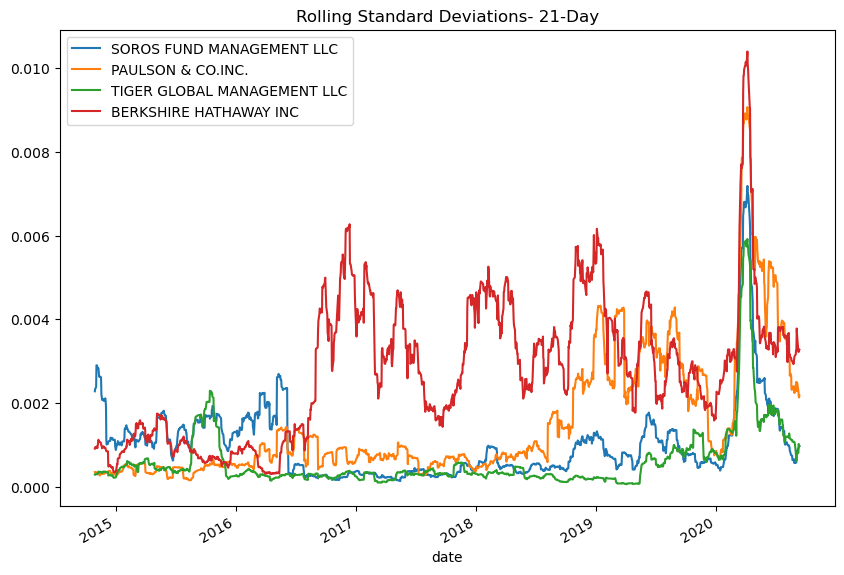

In [65]:
#use the daily_returns df and a 21-day rolling window to plot the rolling standard deviations for ONLY portfolios
daily_returns[["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC"]].rolling(window=21).std().plot(figsize=(10,7), title="Rolling Standard Deviations- 21-Day")

Q: Based on annualized deviation, which portfolios pose more risk than the S&P 500?
A:It looks like the S&P 500 is the riskiest of the five.
Q:Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the SP500 increases?
A:No, Berkshire seems to follow it the closest though.
Q:Based on the rolling standard deviations of only the four portfolios, which poses the mot risk? Does thes change over time?
A:It looks like Berkshire is the riskiest. Paulson seems to overtake Berkshire at times.

In [66]:
#calc annualized average returns
trading_days=252

annualized_average_returns=daily_returns.mean()*trading_days
annualized_average_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [68]:
#calculate the sharpe ratio for each portfolio and S&P500
sharpe_ratios=annualized_average_returns/annualized_standard_deviation
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

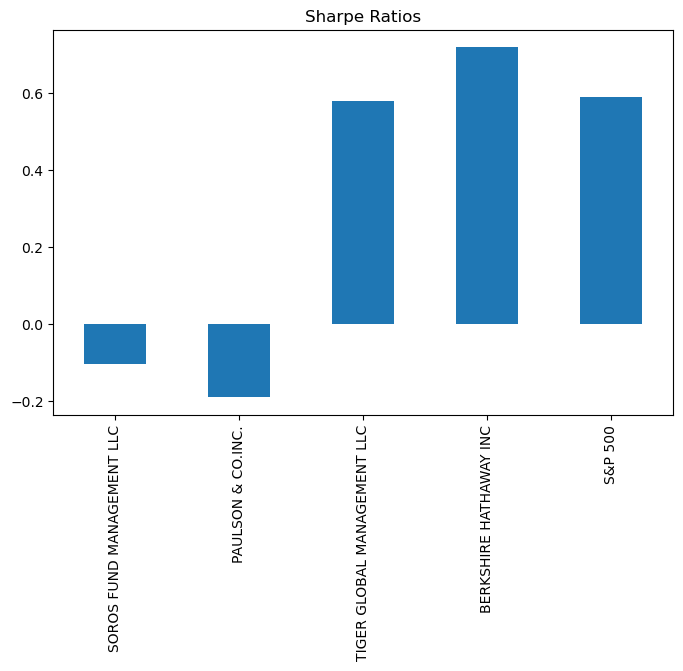

In [74]:
#plot the sharpe ratios
sharpe_ratios.plot(kind="bar",title="Sharpe Ratios", figsize=(8,5))

Q: Which of the four portfolios offers the best risk/return profile? Which offers the worst?
A: I would go with Berkshire Hathaway as the best and Paulson as the worst.

In [77]:
#calc S&P variance
market_variance=daily_returns["S&P 500"].rolling(window=60).var()
market_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

In [78]:
#I'm choosing Berkshire and Tiger for the following steps
#This is the Berkshire .cov
#calc covariance over a 60-day window
covariance_berkshire_market=daily_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns["S&P 500"])
covariance_berkshire_market.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [79]:
#Tiger .cov
covariance_tiger_market=daily_returns["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns["S&P 500"])
covariance_tiger_market.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [80]:
#Berkshire beta
berkshire_beta=covariance_berkshire_market/market_variance
berkshire_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [81]:
#Tiger beta
tiger_beta=covariance_tiger_market/market_variance
tiger_beta.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [82]:
#calc mean for beta of portfolio-Berkshire
berkshire_beta.mean()

0.2214986101354593

In [84]:
#calc mean for beta of portfolio-Tiger
tiger_beta.mean()

0.03093001487238774

<AxesSubplot:title={'center':'Berkshire 60-Day Rolling Beta'}, xlabel='date'>

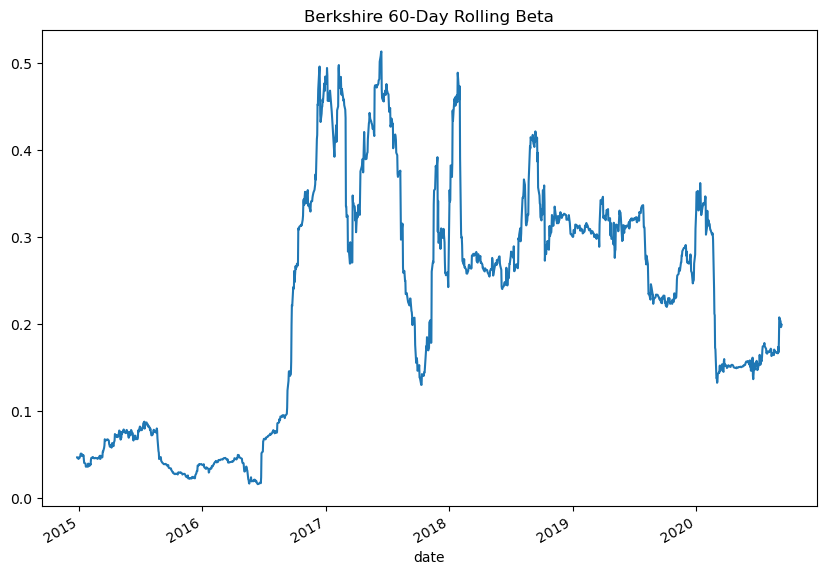

In [85]:
#plot rolling beta- Berkshire
berkshire_beta.plot(figsize=(10,7), title="Berkshire 60-Day Rolling Beta")

<AxesSubplot:title={'center':'Tiger 60-Day Rolling Beta'}, xlabel='date'>

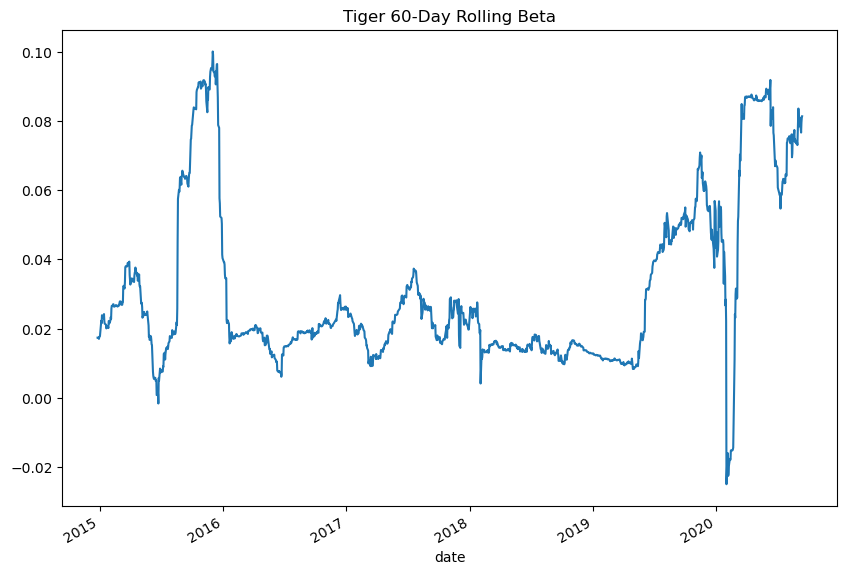

In [86]:
#plot rolling beta- Tiger
#plot rolling beta- Berkshire
tiger_beta.plot(figsize=(10,7), title="Tiger 60-Day Rolling Beta")

Q: Which of the two portfolios seem more sensitive to movements in the S&P 500?
A:Tiger, but not by much.
Q:Which of the two portfolios do you recommend for inclusion in your firm's suite of fund offerings?
A:Berkshire, it seems to have a little more reward.